In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas.io.data as web

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay, CustomBusinessMonthBegin

C:\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [8]:
today = dt.datetime(2015, 12, 31)
start_year = dt.datetime(2015, 1, 1)
start_month = dt.datetime(2015, 12, 1)

In [141]:
closing_prices = web.DataReader(['VOO','VGT','VHT','VDE'], 'yahoo', start_year, today)['Adj Close']
returns = closing_prices.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[:1] = 1 # Set first row to 1

In [142]:
ret_index.head()

,VDE,VGT,VHT,VOO
Date,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.960332,0.982828,0.995075,0.982431
2015-01-06,0.945891,0.970165,0.990308,0.972771
2015-01-07,0.948208,0.978799,1.014061,0.984926
2015-01-08,0.968711,1.000863,1.031697,1.002229


In [143]:
ret_index.columns = ['Energy', 'Information Technology', 'Health Care', 'S&P 500']
ret_index.head()

,Energy,Information Technology,Health Care,S&P 500
Date,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.960332,0.982828,0.995075,0.982431
2015-01-06,0.945891,0.970165,0.990308,0.972771
2015-01-07,0.948208,0.978799,1.014061,0.984926
2015-01-08,0.968711,1.000863,1.031697,1.002229


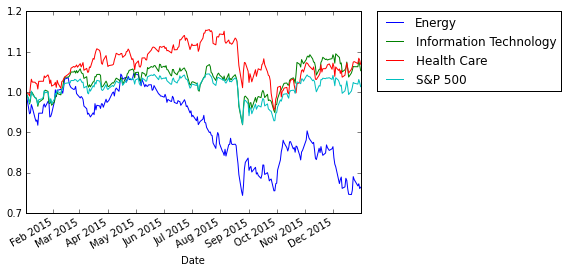

In [144]:
ax = ret_index.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [145]:
holding_return = (ret_index[-1:]-1)/1
holding_return

,Energy,Information Technology,Health Care,S&P 500
Date,,,,
2015-12-31,-0.236074,0.05288,0.068732,0.013251


In [149]:
series = holding_return.unstack()
series.index = ['Energy (VDE)', 'Information Technology (VGT)', 'Health Care (VHT)', 'S&P 500 (VOO)']
series.sort_values(inplace=True)

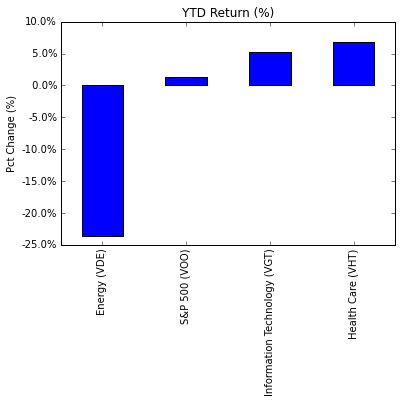

In [150]:
ax = series.plot(kind='bar', title='YTD Return (%)')
plt.ylabel('Pct Change (%)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:>4.1f}%'.format(x*100)))

In [151]:
closing_prices = web.DataReader(['VGK','HEDJ','FXI','CHIQ', 'PEK'], 'yahoo', start_year, today)['Adj Close']
returns = closing_prices.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[:1] = 1 # Set first row to 1

In [152]:
ret_index.head()

,CHIQ,FXI,HEDJ,PEK,VGK
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,1.000798,0.996401,0.972292,1.008021,0.970848
2015-01-06,0.999203,0.984165,0.968716,1.011706,0.959916
2015-01-07,1.008772,1.010077,0.982124,1.026664,0.969889
2015-01-08,1.017544,1.018234,0.995888,0.997399,0.983890


In [154]:
ret_index.columns = ['China Consumer ETF (CHIQ)', 'China Large Cap (FXI)', 'Japan Cxy Hedged (HEDJ)', 'China A Share (PEK)', 'Europe (VGK)']
ret_index.head()

,China Consumer ETF (CHIQ),China Large Cap (FXI),Japan Cxy Hedged (HEDJ),China A Share (PEK),Europe (VGK)
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,1.000798,0.996401,0.972292,1.008021,0.970848
2015-01-06,0.999203,0.984165,0.968716,1.011706,0.959916
2015-01-07,1.008772,1.010077,0.982124,1.026664,0.969889
2015-01-08,1.017544,1.018234,0.995888,0.997399,0.983890


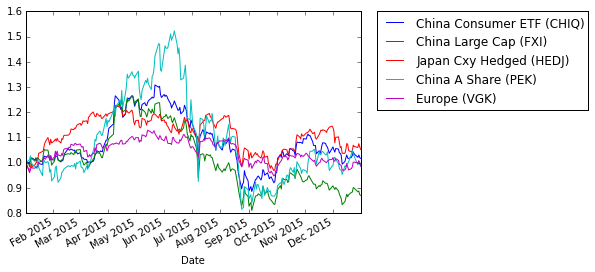

In [155]:
ax = ret_index.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [156]:
holding_return = (ret_index[-1:]-1)/1
holding_return

,China Consumer ETF (CHIQ),China Large Cap (FXI),Japan Cxy Hedged (HEDJ),China A Share (PEK),Europe (VGK)
Date,,,,,
2015-12-31,0.016637,-0.130307,0.051715,-0.014447,-0.014313
